In [1]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
import gmaps
import gmaps.datasets
from pyproj import Proj, transform
import seaborn as sns
from matplotlib.pyplot import figure
sns.set(color_codes=True)
from datetime import date
from datetime import time

In [2]:
df = pd.read_csv("out2.csv")
agency = pd.read_csv("test.csv")
agency.rename(columns={'AGENCY CODE': 'Agency'}, inplace=True)
del df["Unnamed: 0"]

C:\Users\Glen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
date_df = df.copy(deep=True)

In [4]:
from datetime import datetime
date_df['Issue Date'] = pd.to_datetime(date_df['Issue Date'])
date_df

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
0,4320468924,2018-01-13,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
1,4320468935,2018-01-13,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018
2,4320468946,2018-01-13,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
3,4320468950,2018-01-13,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
4,4320468961,2018-01-13,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
5,4320468972,2018-01-13,30.0,CA,201804.0,MAZD,PA,GY,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
6,4320468983,2018-01-13,30.0,CA,201901.0,BMW,PA,GY,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
7,4320468994,2018-01-13,33.0,CA,201807.0,TOYT,PA,BK,5058 MERIDIAN ST,00611,56.0,80.69B,NO PARKING,73.0,6.499506e+06,1.866887e+06,2018
8,4320469005,2018-01-13,35.0,CA,201810.0,TOYT,PA,SL,5058 MERIDIAN ST,00611,56.0,80.69B,NO PARKING,73.0,6.499506e+06,1.866887e+06,2018
9,4320469016,2018-01-13,35.0,CA,201807.0,VOLK,PA,BK,5058 MERIDIAN ST,00611,56.0,80.69B,NO PARKING,73.0,6.499506e+06,1.866887e+06,2018


In [5]:
date_df['Month'] = date_df['Issue Date'].map(lambda x: str(x).split('-')[1])
date_df['Day'] = date_df['Issue Date'].map(lambda x: str(x).split('-')[2])
date_df['Day'] = date_df['Day'].str.strip('T00:00:00')
date_df['Day'] = date_df['Day'].apply(lambda x: str(int(x)).zfill(2))

# Citation Fine Total Dollar Amount Analysis

During 2018, \\$140,372,757 in fines were issued. During the year,the month of March had the highest amount issued with over \\$13,543,000 issued and September was the lowest with \\$9.9 million issued. There was a noticeable trend downward as the year went on, with the lower amount volumes coming at the end of the year.

In [6]:
month_tally = date_df.groupby(['Month'])
fine_avg = month_tally['Fine amount'].mean()
total_fines = month_tally['Fine amount'].sum()
fine_sum = pd.DataFrame({'Total Fines Issued': round(total_fines, 2).astype(float).map("${:,.2f}".format),
                         'Average Fine': round(fine_avg, 2).astype(float).map("${:,.2f}".format)
                             })
fine_sum

,Total Fines Issued,Average Fine
Month,,
01,"$13,062,682.00",$69.51
02,"$11,626,263.00",$69.90
03,"$13,543,268.00",$70.13
04,"$13,276,779.00",$70.22
05,"$12,779,563.00",$70.25
06,"$11,853,053.00",$70.74
07,"$10,561,848.00",$70.96
08,"$11,934,723.00",$70.18
09,"$9,914,194.00",$69.97


<Figure size 800x800 with 0 Axes>

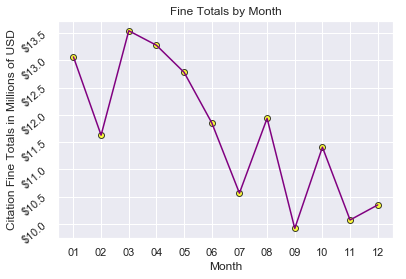

In [7]:
#scatter plot
my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

fine_avg2 = month_tally['Fine amount'].mean()
total_fines2 = month_tally['Fine amount'].sum()
fine_sum2 = pd.DataFrame({'Total Fines Issued in $': round(total_fines, 2),
                          #'Total Citation Count': total_citation,
                          'Average Fine': round(fine_avg, 2)
                             })
fig, ax = plt.subplots()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.yticks(rotation=40)
x=["$9.5","$10.0","$10.5",'$11.0','$11.5','$12.0','$12.5','$13.0','$13.5']
ax.set_yticklabels(x)
plt.scatter(fine_sum2.index.values, fine_sum2['Total Fines Issued in $'], color= 'yellow', edgecolor = 'black', alpha = .75)
plt.plot(fine_sum2.index.values, fine_sum2['Total Fines Issued in $'], color = 'purple')
plt.title('Fine Totals by Month')
plt.ylabel('Citation Fine Totals in Millions of USD')
plt.xlabel('Month')
plt.grid(True)
plt.savefig('Images/FineTotals.jpg', dpi=1000)
plt.show()

# Monthly Citations Analysis

The monthly breakdown of citations showed that the most active day for citations was on the 13th of the month during 2018.  74983 tickets were issued collectively on that date.

In [8]:
citation_month = month_tally['Month'].count()
citation_month_df = pd.DataFrame({'Citations Count': citation_month})
citation_month_df

,Citations Count
Month,
01,188033
02,166386
03,193226
04,189197
05,182153
06,167759
07,148978
08,170184
09,141802


<Figure size 800x800 with 0 Axes>

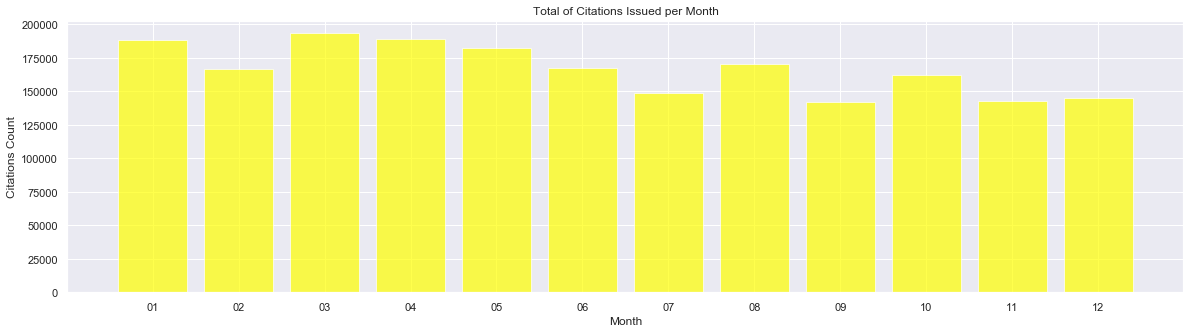

In [9]:
#monthly bar chart
x_axis = np.arange(len(citation_month))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.figure(figsize=(20,5))
plt.bar(x_axis, citation_month, color='yellow', alpha=0.7, align="edge")
plt.xticks(tick_locations, citation_month.index.values)
plt.title("Total of Citations Issued per Month")
plt.xlabel("Month")
plt.ylabel("Citations Count")
plt.grid(True)
plt.savefig('Images/CitationsPerMonth.jpg', dpi = 1000)

# Daily Citations Analysis

The daily breakdown of citations showed that the most active day for citations was on the 13th of the month during 2018.  74983 tickets were issued collectively on that day.  Ignoring the 31st which doesnt fall on everymonth, the 1st was the day with least citations issues with 56094.  But there wasnt a recognizeable trend up or down at any particular time during the month.

In [10]:
day_tally = date_df.groupby(['Day'])
citation_day = day_tally['Day'].count()
citation_day_df = pd.DataFrame({'Citations Count': citation_day})
citation_day_df

,Citations Count
Day,
01,56094
02,68785
03,65400
04,62035
05,70685
06,67686
07,59088
08,58923
09,66678


<Figure size 800x800 with 0 Axes>

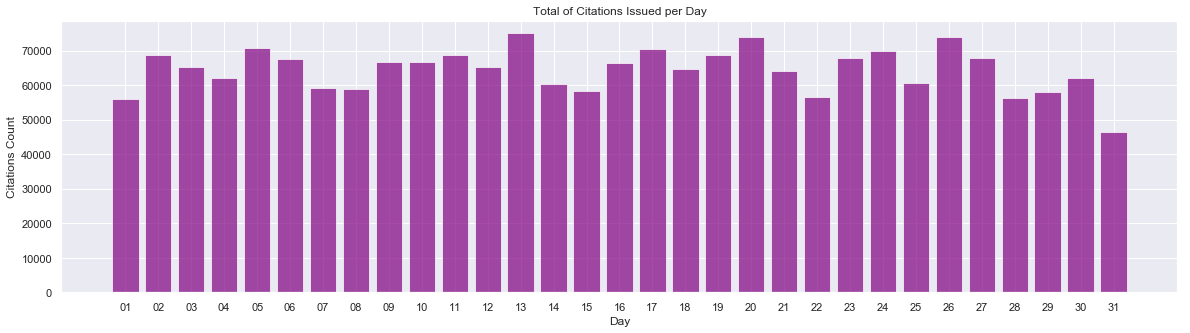

In [11]:
#daily bar chart
x_axis = np.arange(len(citation_day))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.figure(figsize=(20,5))
plt.bar(x_axis, citation_day, color='purple', alpha=0.7, align="edge")
plt.xticks(tick_locations, citation_day.index.values)
plt.title("Total of Citations Issued per Day")
plt.xlabel("Day")
plt.ylabel("Citations Count")
plt.grid(True)
plt.savefig('Images/CitationsPerDay.jpg', dpi =1000)

# Automotive Data Breakdown

In [12]:
cars_df = df.copy(deep=True)

In [13]:
cars_df['Make'] = cars_df['Make'].replace(
    {'TOYT': 'TOYT', 'TOYO': 'TOYT'})
cars_df['Make'] = cars_df['Make'].replace(
    {'ACUR': 'ACUR', 'ACRA': 'ACRA', 'ACR': 'ACUR', 'ACU': 'ACUR'})
cars_df['Make'] = cars_df['Make'].replace(
    {'CHRY': 'CHRY', 'CHRS': 'CHRY', 'CHR': 'CHRY', 'CRY': 'CHRY', 'CRYS': 'CHRY'})
cars_df['Make'] = cars_df['Make'].replace(
    {'NISS': 'NISS', 'DATS': 'NISS'})
cars_df['Make'] = cars_df['Make'].replace(
    {'FRHT': 'FRHT', 'FRGT': 'FRHT', 'FRLN': 'FRHT', 'FRTL': 'FRHT'})
cars_df['Make'] = cars_df['Make'].replace(
    {'HUYN': 'HUYN', 'HUN': 'HUYN', 'HUND': 'HUYN', 'HYDI': 'HUYN', 'HYN': 'HUYN', 'HYND': 'HUYN', 'HYTO': 'HUYN', 'HYUN': 'HUYN'})
cars_df['Make'] = cars_df['Make'].replace(
    {'INFI': 'INFI', 'INF': 'INFI'})
cars_df['Make'] = cars_df['Make'].replace(
    {'LEXS': 'LEXS', 'LEX': 'LEXS', 'LEXU': 'LEXS'})
cars_df['Make'] = cars_df['Make'].replace(
    {'LNDR': 'LNDR', 'LROV': 'LNDR', 'LRVR': 'LNDR'})
cars_df['Make'] = cars_df['Make'].replace(
    {'MAZD': 'MAZD', 'MAZ': 'MAZD', 'MZDA': 'MAZD'})
cars_df['Make'] = cars_df['Make'].replace(
    {'MERZ': 'BENZ', 'BENZ': 'BENZ', 'MBNZ': 'BENZ', 'MBZ': 'BENZ', 'BNZ': 'BENZ' })
cars_df['Make'] = cars_df['Make'].replace(
    {'PORS': 'PORS', 'PORC': 'PORS', 'PORH': 'PORS', 'PRRO': 'PORS', 'PRSH': 'PORS' })
cars_df['Make'] = cars_df['Make'].replace(
    {'SUBA': 'SUBA', 'SUBU': 'SUBA'})
cars_df['Make'] = cars_df['Make'].replace(
    {'VOLK': 'VW', 'VW': 'VW'})
cars_df['Color'] = cars_df['Color'].replace(
    {'WT': 'WT', 'WH': 'WT'})
cars_df['Color'] = cars_df['Color'].replace(
    {'RD': 'RD', 'RE': 'RD', 'MR': 'RD'})
cars_df['Color'] = cars_df['Color'].replace(
    {'GN': 'GN', 'GR': 'GN'})

In [14]:
def determine_brand(row):
    if row in ['TOYT','HOND','FORD','NISS','CHEV','BMW','BENZ','VW','HUYN','LEXS']:
        return row
    else:
        return 'MISC'

cars_df['Brand'] = cars_df.Make.map(determine_brand)
cars_df
#,'DODG','KIA','JEEP', 'AUDI','MAZD','OTHR','GMC','INFI','SUBA','ACUR','CHRY','VOLV','LNDR','MITS','CADI','MNNI','UNK','PORS','FRHT','BUIC','LINC','FIAT','STRN','PONT','GRUM'

def determine_color(row):
    if row in ['WT', 'BK', 'GY', 'SL', 'BL', 'RD', 'GN', 'BN']:
        return row
    else:
        return 'OTHER'

cars_df['Color Group'] = cars_df.Color.map(determine_color)

# Top 10 Brands Cited for Parking Offenses

The top brand to be cited for parking offenses in Los Angeles in 2018 was Toyota by a wide margin.  8 out of 10 were foreign brands.

In [15]:
cars_total = cars_df['Brand'].value_counts().reset_index()
cars_total.columns = ['Brand', 'Count']
cars_total_df = pd.DataFrame(cars_total)
auto_brand_df = cars_total_df[cars_total_df.Brand != 'MISC']
auto_brand_df

,Brand,Count
1,TOYT,348845
2,HOND,228682
3,FORD,169824
4,NISS,150188
5,CHEV,136666
6,BMW,90077
7,BENZ,81597
8,HUYN,65223
9,VW,64431
10,LEXS,57368


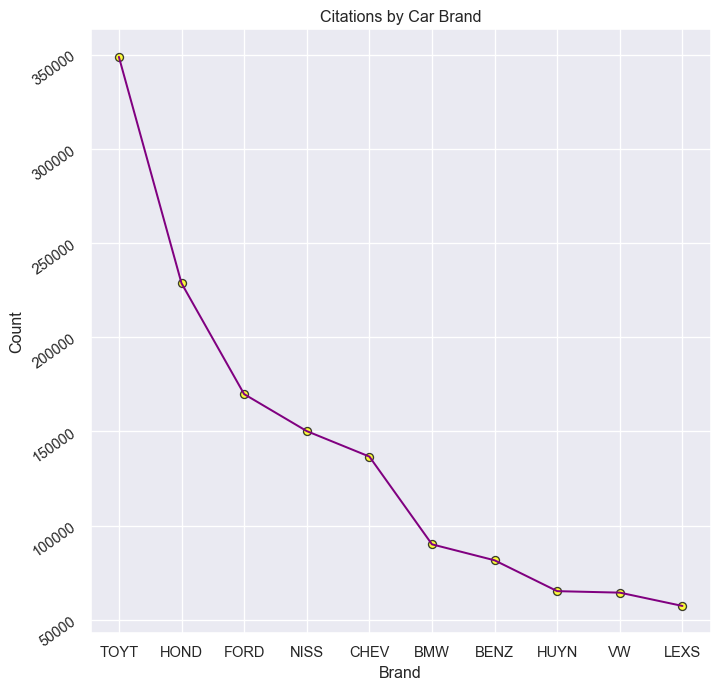

In [16]:
#scatter plot
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.scatter(auto_brand_df['Brand'], auto_brand_df['Count'], color= 'yellow', edgecolor = 'black', label = 'Rural', alpha = .75)
plt.plot(auto_brand_df['Brand'], auto_brand_df['Count'], color = 'purple')
plt.title('Citations by Car Brand')
plt.yticks(rotation=35)
plt.ylabel('Count')
plt.xlabel('Brand')
plt.grid(True)

plt.savefig('Images/CitationsByBrand.jpg', dpi=1000)
plt.show()

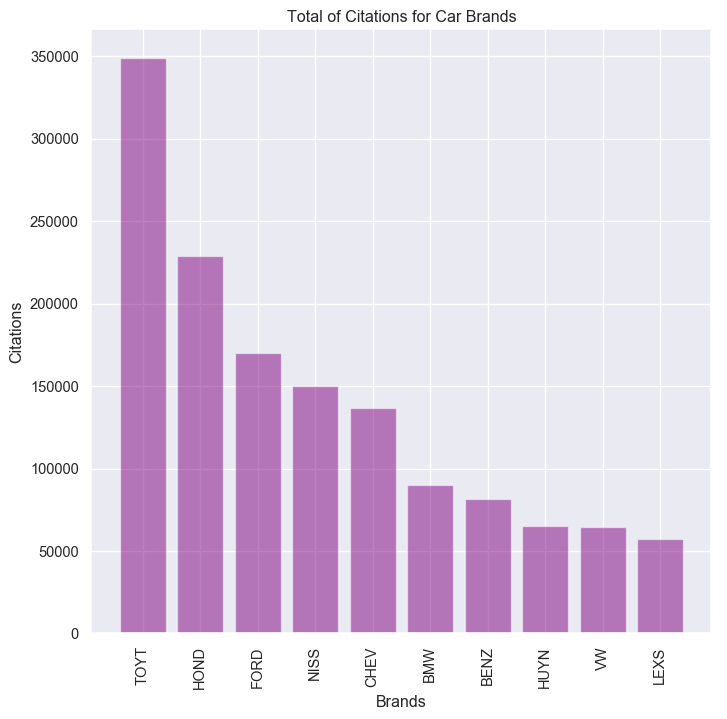

In [17]:
#brands bar chart
x_axis = np.arange(len(auto_brand_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

plt.bar(x_axis, auto_brand_df["Count"], color='purple', alpha=0.5, align="edge")
plt.xticks(tick_locations, auto_brand_df["Brand"], rotation="vertical")

plt.title("Total of Citations for Car Brands")
plt.xlabel("Brands")
plt.ylabel("Citations")
plt.savefig('Images/CitationsByBrandBarChart.jpg', dpi = 1000)

# Color of Cars Cited for Parking Offenses

The number one color to be cited was white closely followed by black.

In [18]:
colors_total = cars_df['Color Group'].value_counts().reset_index()
colors_total.columns = ['Color', 'Count']
cars_total_df  = pd.DataFrame(colors_total)

cars_total_df 

,Color,Count
0,WT,453310
1,BK,434436
2,GY,398766
3,SL,242063
4,BL,153636
5,RD,125771
6,OTHER,103026
7,GN,51533
8,BN,35397


<Figure size 800x800 with 0 Axes>

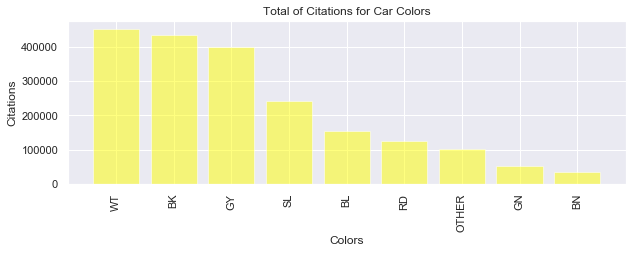

In [19]:
#colors bar chart
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
colors_total = cars_df['Color Group'].value_counts().reset_index()
colors_total.columns = ['Color', 'Count']
colors_total_df = pd.DataFrame(colors_total)

x_axis = np.arange(len(colors_total_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, colors_total_df['Count'], color='yellow', alpha=0.5, align="edge")
plt.xticks(tick_locations, colors_total_df['Color'], rotation="vertical")
plt.title("Total of Citations for Car Colors")
plt.xlabel("Colors")
plt.ylabel("Citations")
plt.savefig('Images/CitationByCarColor.jpg', dpi=1000)

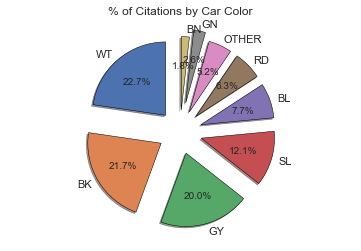

In [20]:
#pie chart

labels = colors_total_df['Color']
explode = [.3, .3, .3, .3, .3, .3, .3, .4, .3]
plt.pie(colors_total_df['Count'], explode= explode, startangle = 90, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Citations by Car Color')
plt.axis('equal')
plt.savefig('Images/ColorPIEchart.jpg')
plt.show()

In [21]:
d = {'Ticket number':'Tickets Received', 'Fine amount':'Fine Total'}

car9_df = cars_df.groupby('Brand').agg({'Ticket number':'count','Fine amount':'sum'}).rename(columns=d)
car9 = car9_df.sort_values('Fine Total', ascending=False)
car9.drop(car9.index[0],inplace=True)
car9

,Tickets Received,Fine Total
Brand,,
TOYT,348845,24825201.0
HOND,228682,16098598.0
FORD,169824,11964214.0
NISS,150188,10762651.0
CHEV,136666,9695297.0
BMW,90077,5910110.0
BENZ,81597,5562228.0
HUYN,65223,4647983.0
VW,64431,4378457.0


In [22]:
car12_df = car9.head(10)
car12_df.sort_index(inplace=True)
car12_df

,Tickets Received,Fine Total
Brand,,
BENZ,81597,5562228.0
BMW,90077,5910110.0
CHEV,136666,9695297.0
FORD,169824,11964214.0
HOND,228682,16098598.0
HUYN,65223,4647983.0
LEXS,57368,3988054.0
NISS,150188,10762651.0
TOYT,348845,24825201.0


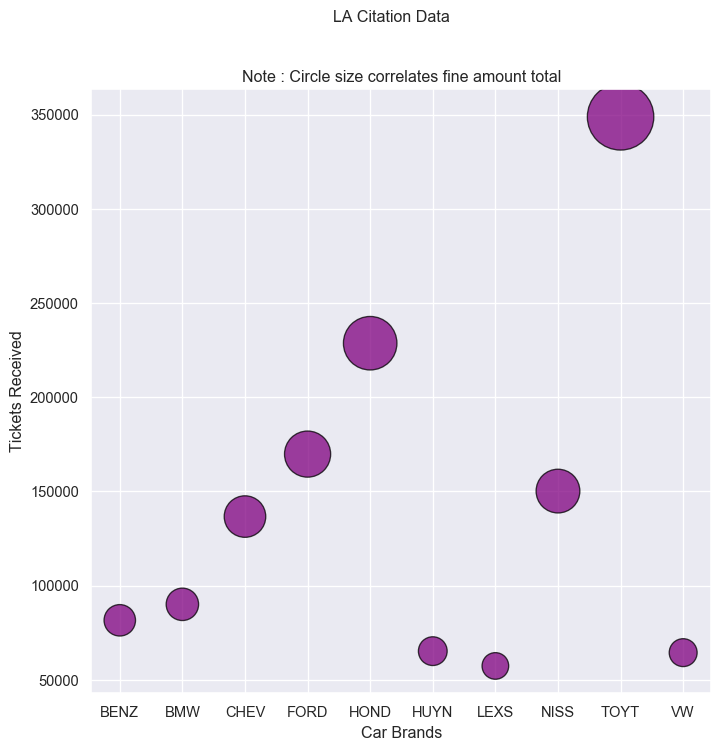

In [23]:
#tickets received by car brand and fine $ amount totals in circle size
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.suptitle('LA Citation Data')

plt.scatter(car12_df.index.values, car12_df['Tickets Received'], s=car12_df['Fine Total']/10000, color = 'purple', edgecolor = 'black', alpha = .75)

plt.title('Note : Circle size correlates fine amount total')
plt.xlabel('Car Brands')
plt.ylabel('Tickets Received')
plt.savefig('Images/CitationDataBubbleChart.jpg', dpi=1000)
plt.grid(True)

# Violation Type analysis

- Analysis was done to check the highest violation in LA and how much revenue was generated from it for 2018.

In [24]:
cases = df.groupby('Violation code')['Violation Description'].apply(lambda x: set(list(x))).to_frame()
cases['unique_desc'] = cases['Violation Description'].map(lambda x: len(x))
cases.sort_values(by='unique_desc', ascending=False)#.to_clipboard(sep='\t')

def clean_the_code(some_code):
    return some_code.replace(".", "").replace("*", "").replace("+", "")

cases['clean_code'] = cases.index.map(clean_the_code)
cases.head()

,Violation Description,unique_desc,clean_code
Violation code,,,
000,"{nan, 8306, 8073L, 225111, 8054H, 80361, 5200H...",218,000
001,{21113A},1,001
002,{4000A},1,002
005,{21461},1,005
006,{22500A},1,006


In [25]:
code_lookup = dict(zip(cases.index, cases.clean_code))
clean_df = df.copy(deep=True)
clean_df['clean_code_mapped'] = clean_df['Violation code'].map(lambda x: code_lookup.get(x, "Checkmelater"))
clean_df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,clean_code_mapped
0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B
1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,5200
2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B
3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B
4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B


In [26]:
clean_df['clean_code_mapped']  = clean_df['clean_code_mapped'].replace({'8069A':'8069AA'})
group = clean_df.groupby('clean_code_mapped').agg({"Violation Description":"first","Ticket number":"count"}).sort_values(by='Ticket number',ascending=False)
group.head()

,Violation Description,Ticket number
clean_code_mapped,,
8069BS,NO PARK/STREET CLEAN,594541
8813B,METER EXP.,295527
8056E4,RED ZONE,166904
8058L,PREFERENTIAL PARKING,145586
5204A-,DISPLAY OF TABS,123414


In [27]:
group1 = group[group['Ticket number'] > 10000]
group1 = group1.set_index('Violation Description')
group1.head()

,Ticket number
Violation Description,
NO PARK/STREET CLEAN,594541
METER EXP.,295527
RED ZONE,166904
PREFERENTIAL PARKING,145586
DISPLAY OF TABS,123414


<Figure size 800x800 with 0 Axes>

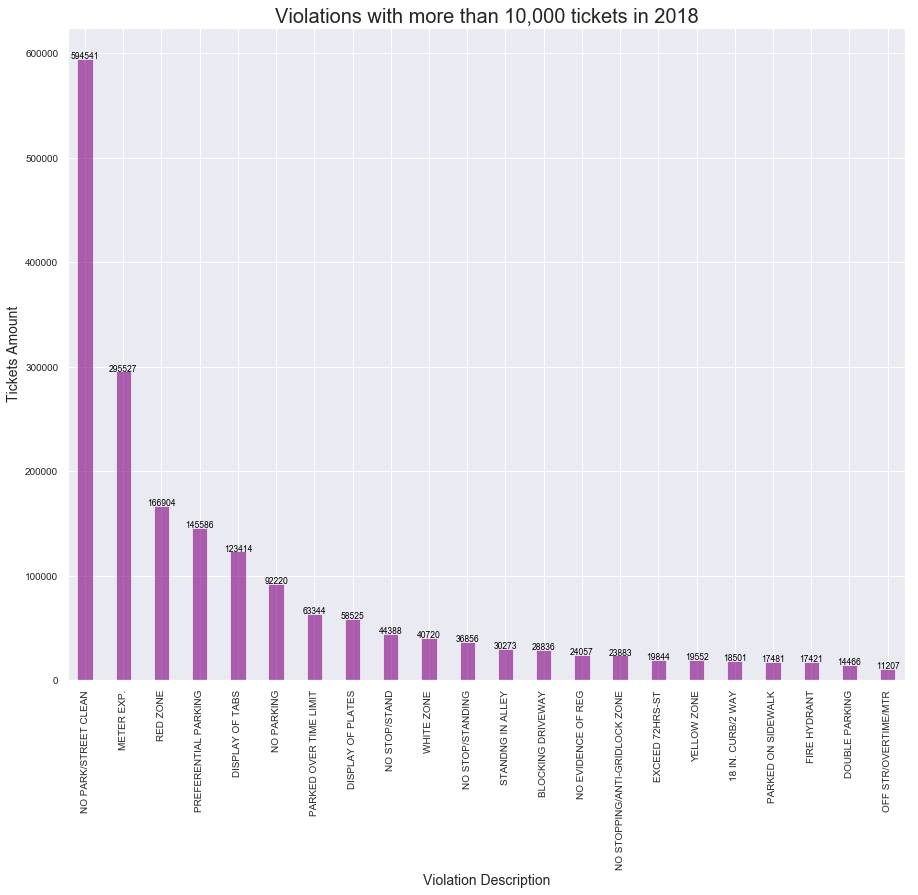

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

g = group1.plot(kind='bar',legend=False,color="purple",width=.4, alpha=0.6, figsize=(15,12), fontsize=10)
g.set_ylabel('Tickets Amount',fontsize=14)
g.set_xlabel('Violation Description',fontsize=14)
g.set_title("Violations with more than 10,000 tickets in 2018",fontsize=20)

rects = g.patches
labels = group1['Ticket number']

for rect, label in zip(rects, labels):
    g.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+8, label,
               fontsize=8.5, color='black', ha='center')
    
plt.savefig('FineTotals.jpg', dpi=1000)

# Tickets vs Location heat map

- Analysis was done to check the most ticket violation in Los Angeles area.

In [29]:
clean_df.isnull().sum()
clean_df['month'] = df['Issue Date'].map(lambda x: str(x).split('-')[1])
clean_df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,clean_code_mapped,month
0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B,01
1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,5200,01
2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B,01
3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B,01
4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,8069B,01


# Agency vs Tickets and revenue
- Analysis was done to check the agencies giving the most tickets and making the most revenue.

In [30]:
from pyproj import Proj, transform
def convert_lon(row):
   inProj = Proj(init='epsg:2229',preserve_units = True)
   outProj = Proj(init='epsg:4326')
   x1,y1 = row.Latitude,row.Longitude
   LONGITUDE,LATITUDE = transform(inProj,outProj,x1,y1)
   return LONGITUDE

def convert_lat(row):
   inProj = Proj(init='epsg:2229',preserve_units = True)
   outProj = Proj(init='epsg:4326')
   x1,y1 = row.Latitude,row.Longitude
   LONGITUDE,LATITUDE = transform(inProj,outProj,x1,y1)
   return LATITUDE

con_df = df.copy(deep=True)
# con_df['Converted_cordinates'] = con_df.apply(convert_lon,axis=1)
con_df['Converted_Lon'] = con_df.apply(convert_lon,axis=1)
con_df['Converted_Lat'] = con_df.apply(convert_lat,axis=1)
con_df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Converted_Lon,Converted_Lat
0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,-118.206434,34.120459
1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,-118.206434,34.120459
2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,-118.206434,34.120459
3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,-118.206434,34.120459
4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,-118.206434,34.120459


In [31]:
main = pd.merge(con_df,agency, on='Agency', how='left')
#df["Ticket number"].value_counts()
agency_ticket = main.groupby("AGENCY SHORT NAME")["Ticket number"].count()
agency_ticket
main.dropna(inplace=True)
main
agency_rev = main.groupby("AGENCY SHORT NAME")["Fine amount"].sum()
agency_rev_avg = main.groupby("AGENCY SHORT NAME")["Fine amount"].max()
agency_rev_avg
summary=pd.DataFrame({'Total_Tickets':agency_ticket,'Total_Revenue':agency_rev,'Average_Revenue_Per_Ticket':agency_rev_avg}).reset_index()
summary=summary.rename({'index':'AGENCY SHORT NAME'},axis=1)
summary
group = main.groupby('AGENCY SHORT NAME').agg({"Violation Description":"max","Ticket number":"count"})
group

,Violation Description,Ticket number
AGENCY SHORT NAME,,
AIRPT BACK,NO EVIDENCE OF REG,1
AMTRAK,WHITE CURB,1
BANDIT CAB,NO PARKING,1
BLDG & SAF,SAFETY ZONE/CURB,42
DOT - CNTL,YELLOW ZONE,379422
DOT - HARB,RED ZONE,2
DOT - HLYW,YELLOW ZONE,436208
DOT - STHN,YELLOW ZONE,192576
DOT - VALY,YELLOW ZONE,333154


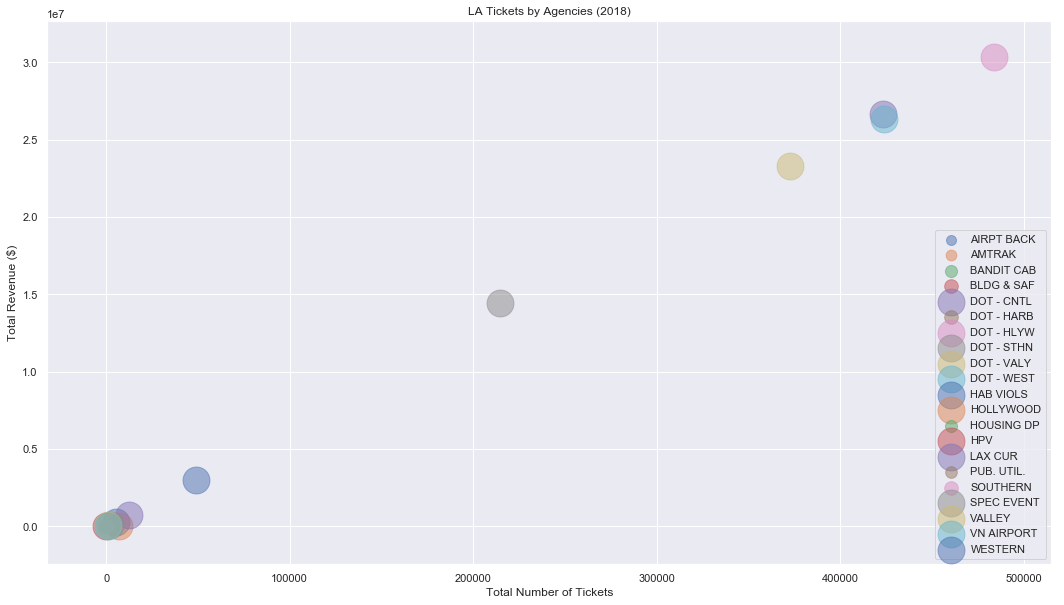

<Figure size 432x288 with 0 Axes>

In [32]:
summary.dropna(inplace=True)
def plot():
    plt.figure(figsize=(18,10))
    for a in summary["AGENCY SHORT NAME"].unique():
        temp=summary[summary["AGENCY SHORT NAME"]==a]
        x=list(temp["Total_Tickets"])
        y=list(temp["Total_Revenue"])
        sizes=[i*2 for i in temp["Average_Revenue_Per_Ticket"]]
        plt.scatter(x,y,label=a,s=sizes,alpha=.5)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.title("LA Tickets by Agencies (2018)")
    plt.ylabel("Total Revenue ($)")
    plt.xlabel("Total Number of Tickets")
#     plt.text(550000, 400000,"Note: Circle size correlates with average ticket per agency.")
    plt.show()
   
plot()
plt.savefig('Agencies_Ticket.png')

# Heat Map for Tickets in LA

In [33]:
gmaps.configure(api_key="")
los_angeles_coordinates = (34.0522, -118.2437)
gmaps.figure(center=los_angeles_coordinates, zoom_level=12)

locations = main[['Converted_Lat','Converted_Lon']]
# weights = main['Fine amount']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)
# heatmap_layer = gmaps.heatmap_layer(locations,weights=weights)
fig.add_layer(heatmap_layer)
heatmap_layer.max_intensity = 300
heatmap_layer.point_radius = 3
fig


Figure(layout=FigureLayout(height='420px'))

# Hourly Ticket Analysis
The graph shows a drastic jump in issued tickets starting at 8am and lasting throughout noon, wherafter the number of citations start to decrease. Most of the citations were issued at 8am, 10am, and noon.

In [34]:
df1 = df.copy(deep=True)

In [35]:
df1.replace(["NaN", 'NaT'], np.nan, inplace = True)
df1 = df1.dropna()

#check Nan values were dropped from Issue Time column

df1[df1["Issue time"].isnull()]

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year


In [36]:
df1['Issue time'] = df1['Issue time'].apply(lambda x: str(int(x)).zfill(4))
df1['Issue time'] = df1['Issue time'].map(lambda x: str(x)[:-2])
df1["Issue time"].sample(10)

75577      07
226293     09
440081     10
874963     09
1525703    15
574547     14
1570530    10
1419040    14
1484909    16
540634     10
Name: Issue time, dtype: object

In [37]:
newdf = df1.groupby("Issue time").count()
newdf.sort_values('Issue time', ascending=True)
newdf

,Ticket number,Issue Date,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
Issue time,,,,,,,,,,,,,,,,
00,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898
01,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632
02,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973
03,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141
04,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608
05,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897
06,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882
07,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302
08,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627


In [38]:
final_chart1 = newdf[["Ticket number"]]
final_chart1= final_chart1.rename(index={"00":"12am","01":"1am","02":"2am","03":"3am","04":"4am","05":"5am","06":"6am","07":"7am","08":"8am","09":"9am","10":"10am","11":"11am","12":"12pm","13":"1pm","14":"2pm","15":"3pm","16":"4pm","17":"5pm","18":"6pm","19":"7pm","20":"8pm","21":"9pm","22":"10pm","23":"11pm"})
final_chart1

,Ticket number
Issue time,
12am,18898
1am,42632
2am,41973
3am,26141
4am,24608
5am,16897
6am,26882
7am,41302
8am,231627


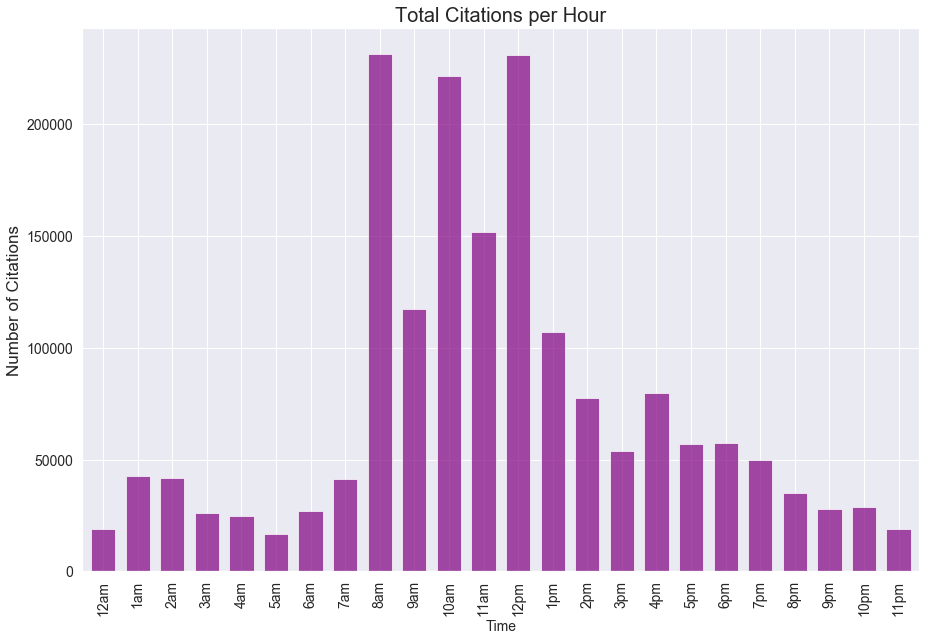

In [39]:
final_chart1.plot(kind='bar',legend=False,color="purple",width=.7, alpha=0.7, figsize=(15,10), fontsize=14)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Number of Citations",fontsize=17)
plt.title("Total Citations per Hour",fontsize=20)

plt.savefig("hourly_citations.png")

plt.show()

# Analysis
The graph shows a leveled number of ticket accross the workweek. Just about a 1/4 of the daily citations happened on Saturday and Sunday individually. Tuesday saw the most citations by about 25,000 more than Wednesday or Thursday.

In [40]:

df1['Issued Date'] = df1['Issue Date'].map(lambda x: str(x)[:-9])
df1["Issued Date"] = pd.to_datetime(df1['Issued Date'])

#verify data type changed

df1.dtypes

Ticket number                    object
Issue Date                       object
Issue time                       object
RP State Plate                   object
Plate Expiry Date               float64
Make                             object
Body Style                       object
Color                            object
Location                         object
Route                            object
Agency                          float64
Violation code                   object
Violation Description            object
Fine amount                     float64
Latitude                        float64
Longitude                       float64
year                              int64
Issued Date              datetime64[ns]
dtype: object

In [41]:
#get day of week from date

df1['Day'] = df1['Issued Date'].dt.dayofweek

#verify change

df1.sample(10)

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Issued Date,Day
1691728,4342990234,2018-10-29T00:00:00,09,FL,201906.0,KIA,PA,BK,750 BURNSIDE AVE,00142,51.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.455736e+06,1.844924e+06,2018,2018-10-29,0
1280643,4337558912,2018-08-09T00:00:00,19,CA,201907.0,FORD,PA,BK,4324 ALLOTT AVE,00309,53.0,80.58L,PREFERENTIAL PARKING,68.0,6.432183e+06,1.876614e+06,2018,2018-08-09,3
790612,4332158106,2018-05-09T00:00:00,09,CA,201811.0,BMW,PA,BK,245 118TH ST W,00555,55.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.477622e+06,1.795737e+06,2018,2018-05-09,2
1217196,4337162163,2018-07-26T00:00:00,14,CA,201811.0,NISS,PA,BK,740 STANLEY AVE,102R,51.0,80.69C,PARKED OVER TIME LIMIT,58.0,6.453777e+06,1.845038e+06,2018,2018-07-26,3
410304,4327513750,2018-03-19T00:00:00,13,CA,201811.0,MAZD,PA,WT,5600 GLENNIE LANE,00186,51.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.450265e+06,1.836066e+06,2018,2018-03-19,0
398716,4327335504,2018-03-06T00:00:00,16,CA,7.0,TOYT,PA,SL,327 4TH ST E,00600,56.0,80.69AA+,NO STOP/STAND,93.0,6.486045e+06,1.840565e+06,2018,2018-03-06,1
163965,4325171325,2018-01-17T00:00:00,08,CA,201604.0,FORD,MH,BG,12000 CHANDLER BLVD,00353,53.0,5204A-,DISPLAY OF TABS,25.0,6.442390e+06,1.883886e+06,2018,2018-01-17,2
767418,4332011202,2018-05-06T00:00:00,18,CA,201903.0,KIA,PA,WT,1263 BROWNING BLVD,00500,55.0,80.53,PARKED IN PARKWAY,63.0,6.470932e+06,1.826915e+06,2018,2018-05-06,6
1326587,4338728586,2018-08-17T00:00:00,12,CA,201903.0,HOND,PA,WT,5112 LATHAM ST,549B,55.0,80.69BS,NO PARK/STREET CLEAN,73.0,9.999900e+04,9.999900e+04,2018,2018-08-17,4
906229,4333525254,2018-05-30T00:00:00,10,CA,201810.0,TOYT,PA,SL,14335 DELANO ST,00363,53.0,88.13B+,METER EXP.,63.0,6.427050e+06,1.889150e+06,2018,2018-05-30,2


In [42]:
#groupby to get citation counts by day

out = df1.groupby("Day").count()
out.head(10)

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Issued Date
Day,,,,,,,,,,,,,,,,,,
0,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351,297351
1,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652,355652
2,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752,336752
3,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041,340041
4,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739,280739
5,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869,85869
6,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864,88864


In [43]:
out = out[["Ticket number"]]
final_chart=out.rename(index={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
final_chart

,Ticket number
Day,
Monday,297351
Tuesday,355652
Wednesday,336752
Thursday,340041
Friday,280739
Saturday,85869
Sunday,88864


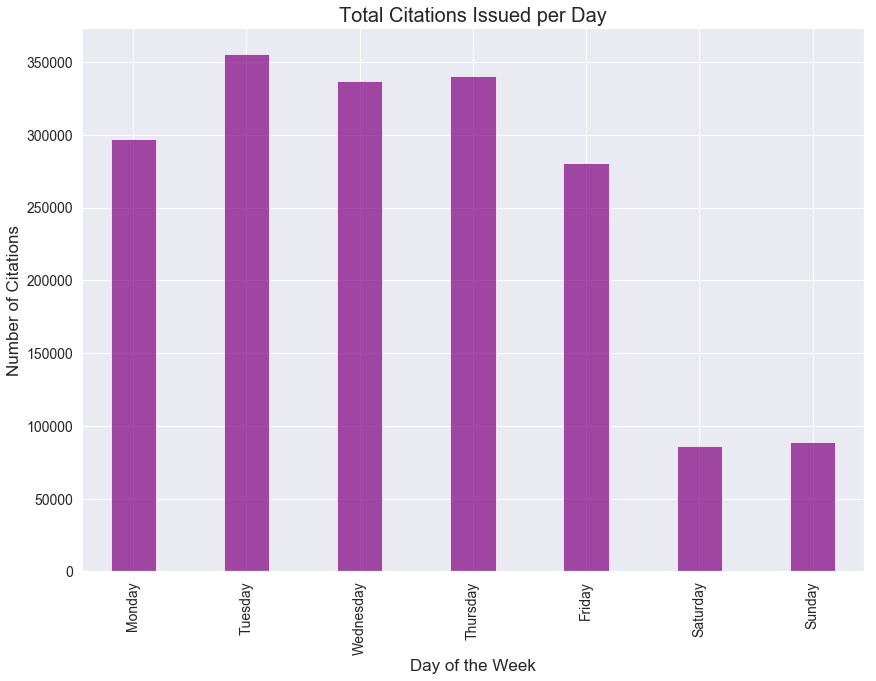

In [44]:
final_chart.plot(kind='bar',legend=False,color="purple",width=.4, alpha=0.7, figsize=(14,10), fontsize=14)
plt.xlabel("Day of the Week",fontsize=17)
plt.ylabel("Number of Citations",fontsize=17)
plt.title("Total Citations Issued per Day",fontsize=20)

plt.savefig("daily_citations.png")
plt.show()